In [55]:
include("src/main.jl")
using StatPlots
OPTCONFIG=OptConfig(XTOLABS=1e-8, DEBUG=true);

In [44]:
using LaTeXStrings
pyplot(grid=false, xticks=2, yticks=0, legendfontsize=12, legend=:topright, linewidth=2, tickfont=11)

Plots.PyPlotBackend()

In [111]:
# polynomial
xlims=(1,2)
n = 500
ndata = 1000
σ = 0.1
prior = Truncated(MixtureModel([Normal(mu, 0.12) for mu in [1.25, 1.75]]), 1,2)

reg  =.2
regd = 1.003

texp = 6
t    = Transformation(x->x^texp, x->x^(1/texp))

ylims1 = (0,2)
ylims2 = (0, 0.12)

FEModel(ft, 1.0:0.12625250501002003:64.0, 0.1)

In [ ]:
# exponential
xlims = (0,4)
n = 500
ndata =1000
σ = 0.3
prior = Truncated(MixtureModel([Normal(mu, .5) for mu in [1, 3]]), xlims...)

reg  = .5
regd = 1.001

t    = Transformation(x->exp(x), x->log(x))

ylims1=:auto
ylims2=:auto

In [99]:
m = FEModel(f=x->x, xs=linspace(xlims...,n), σ=σ)
d = generatedata(m, prior, ndata);
mt   = transformmodel(m, t)

FEModel(ft, 1.0:0.1074111223109103:54.598150033144236, 0.3)

length(xhist) = 67



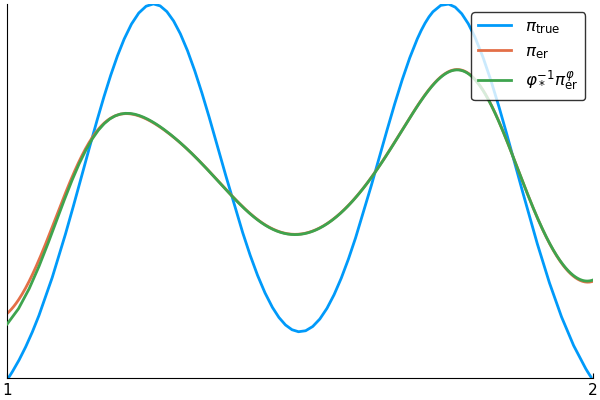

In [112]:
w = ebprior(m, d, reg)
@show length(xhist)
plot(prior, label=L"\pi_{\rm true}")
plot!(m.xs, weighttodensity(m.xs,w), label=L"\pi_{\rm er}")

wt = ebprior(mt,d,reg)
xsp, wtp = pullbackdensity(t, mt.xs, weighttodensity(mt.xs,wt))
plot!(xsp, wtp, label=L"\varphi_*^{-1} \pi^\varphi_{\rm er}")


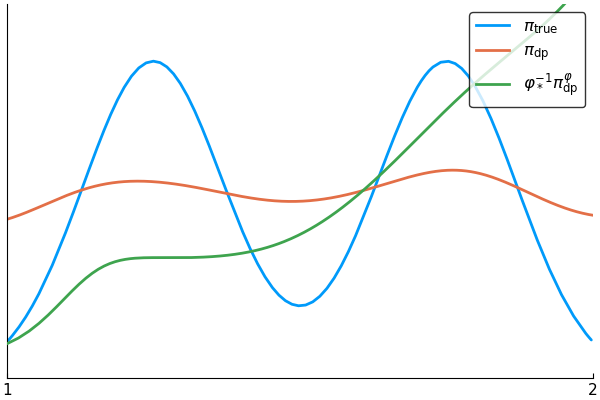

In [113]:
wp = dirichletprior(m,d,regd)
plot(prior, label=L"\pi_{\rm true}")
plot!(m.xs, weighttodensity(m.xs,wp), label=L"\pi_{\rm dp}")

wpt = dirichletprior(mt, d, regd)
plot!(pullbackdensity(t, mt.xs, weighttodensity(mt.xs,wpt))..., label=L"\varphi_*^{-1}\pi^\varphi_{\rm dp}")
plot!(ylims=ylims1)


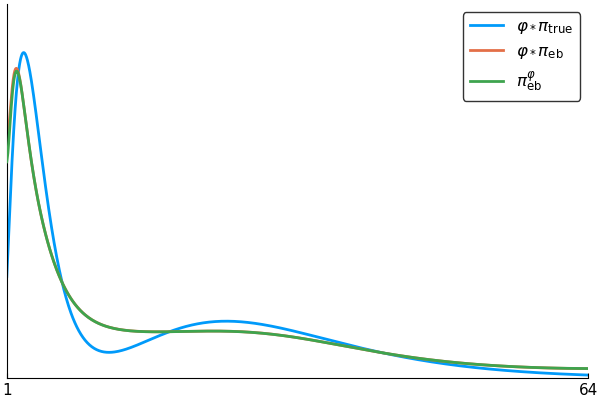

In [114]:
plot(pushforwarddensity(t, m.xs, pdf.(prior, m.xs)), label=L"\varphi_*\pi_{\rm true}")
plot!(pushforwarddensity(t, m.xs, weighttodensity(m.xs, w)), label=L"\varphi_* \pi_{\rm eb}")
plot!(mt.xs, weighttodensity(mt.xs, wt), label=L"\pi^\varphi_{\rm eb}")
plot!(ylims=ylims2, xticks=[extrema(mt.xs)...])


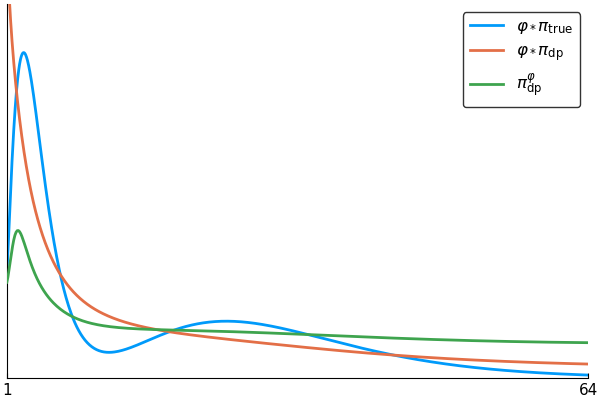

In [115]:
plot(pushforwarddensity(t, m.xs, pdf.(prior, m.xs)), label=L"\varphi_*\pi_{\rm true}")
plot!(pushforwarddensity(t, m.xs, weighttodensity(m.xs, wp)), label=L"\varphi_*\pi_{\rm dp}")
plot!(mt.xs, weighttodensity(mt.xs, wpt), label=L"\pi^\varphi_{\rm dp}")
plot!(ylims=ylims2, xticks=[extrema(mt.xs)...])